# Sampling in Python

In [1]:
# Setup header
import pandas as pd
import matplotlib.pyplot as plt

attrition_pop = pd.read_feather('attrition.feather')
spotify_population = pd.read_feather('spotify_2000_2020.feather')

## Introduction to Sampling

### Simple sampling with pandas

First, how large is the Spotify dataset?

In [2]:
len(spotify_population)

41656

That might be a bit large (probably not but let's roll with the idea). Here's a sample of 1000 data points from `spotify_population`:

In [3]:
spotify_population.sample(1000)

,acousticness,artists,danceability,duration_ms,duration_minutes,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
1430,0.266000,['Pharrell Williams'],0.934,201933.0,3.365550,0.798,0.0,24MSdaNRlLgjp8xYeJeXwZ,0.000045,0.0,0.0962,-5.665,1.0,Come Get It Bae,58.0,2014-03-03,0.0849,120.162,0.895,2014.0
25179,0.000025,['The Smashing Pumpkins'],0.476,202133.0,3.368883,0.855,0.0,1XPta4VLT78HQnVFd1hlsK,0.690000,8.0,0.0490,-6.046,1.0,Today,57.0,2001-01-01,0.0265,82.955,0.408,2001.0
21908,0.013500,['Mac Miller'],0.794,195873.0,3.264550,0.766,1.0,51pshtuYkgUQnt5huMPbKL,0.000000,9.0,0.0785,-3.894,0.0,The Spins,67.0,2010-08-13,0.0377,127.007,0.550,2010.0
831,0.002040,['Adele'],0.649,191867.0,3.197783,0.820,0.0,3LtjtQ5Gg0qL6klVIXqmrV,0.000000,0.0,0.1270,-5.335,1.0,Cold Shoulder,47.0,2008-01-28,0.0479,109.952,0.355,2008.0
16837,0.393000,['*NSYNC'],0.656,255360.0,4.256000,0.390,0.0,2hXhC1nZ5GeEmjbQOshHSI,0.000000,7.0,0.1050,-8.811,1.0,Something Like You,38.0,2001-07-24,0.0300,123.984,0.274,2001.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10120,0.117000,"['Galantis', 'Throttle']",0.762,190400.0,3.173333,0.797,0.0,5kgqTe1BM720OjU78TGYDw,0.000000,5.0,0.2020,-2.710,1.0,Tell Me You Love Me,60.0,2017-09-15,0.1350,122.066,0.525,2017.0
40722,0.000348,['blink-182'],0.565,200360.0,3.339333,0.947,0.0,0y3fPWWin7NL5aED2FjvXP,0.000000,0.0,0.3990,-4.941,1.0,Wishing Well,48.0,2011-01-01,0.0479,100.002,0.587,2011.0
9181,0.345000,['Maroon 5'],0.595,187920.0,3.132000,0.764,0.0,6zaKzSQwWtxqAvBvoubEWo,0.000000,4.0,0.0855,-4.631,0.0,Nothing Lasts Forever,41.0,2007-01-01,0.0304,95.959,0.558,2007.0
19288,0.356000,"['Eurythmics', 'Annie Lennox', 'Dave Stewart']",0.503,275373.0,4.589550,0.682,0.0,7FlAFvZuw7YXqukW8EjFTZ,0.000000,11.0,0.3090,-5.320,0.0,Miracle of Love - Remastered Version,39.0,2005-11-08,0.0271,106.380,0.323,2005.0


Now let's compare population and sample means:

In [4]:
# Sample 1000 rows from spotify_population
spotify_sample = spotify_population.sample(n=1000)

# Print the sample
# print(spotify_sample)

# Calculate the mean duration in mins from spotify_population
mean_dur_pop = spotify_population['duration_minutes'].mean()

# Calculate the mean duration in mins from spotify_sample
mean_dur_samp = spotify_sample['duration_minutes'].mean()

# Print the means
print(f'mean_dur_pop: {mean_dur_pop}')
print(f'mean_dur_samp: {mean_dur_samp}')

mean_dur_pop: 3.8521519140900073
mean_dur_samp: 3.88085275


### Simple sampling and calculating with NumPy

Pretty self-explanatory:

In [5]:
# Create a pandas Series from the loudness column of spotify_population
loudness_pop = spotify_population['loudness']

# Sample 100 values of loudness_pop
loudness_samp = loudness_pop.sample(n=100)

# Calculate the mean of loudness_pop
mean_loudness_pop = np.mean(loudness_pop)

# Calculate the mean of loudness_samp
mean_loudness_samp = np.mean(loudness_samp)

print(f'mean_loudness_pop: {mean_loudness_pop}')
print(f'mean_loudness_samp: {mean_loudness_samp}')

mean_loudness_pop: -7.366856851353947
mean_loudness_samp: -8.01138


### Are findings from the sample generalizable?

Histogram of `acousticness` at the population level for the Spotify dataset:

<Axes: >

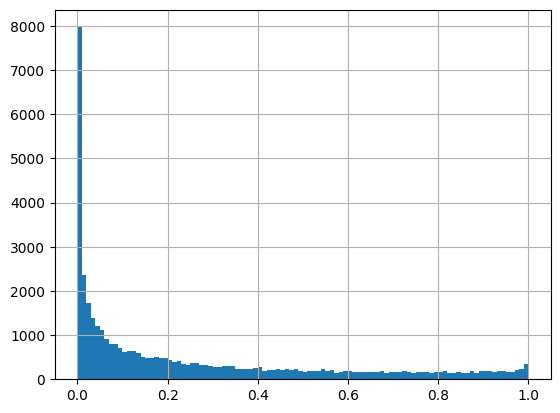

In [6]:
# Visualize the distribution of acousticness with a histogram
spotify_population['acousticness'].hist(bins=np.arange(0, 1.01, 0.01))

Some cheating:

In [7]:
spotify_mysterious_sample = spotify_population[spotify_population['acousticness'] >= 0.951]

And now a histogram of the "mysterious sample":

<Axes: >

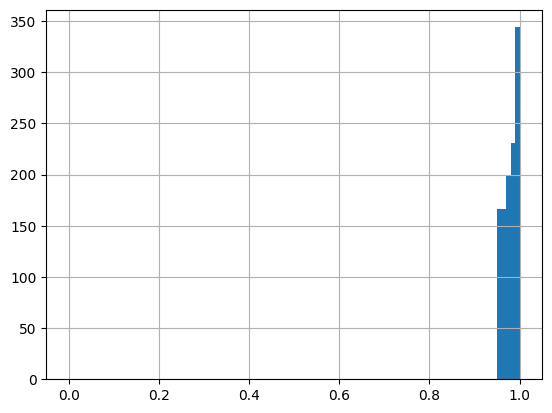

In [8]:
spotify_mysterious_sample['acousticness'].hist(bins=np.arange(0, 1.01, 0.01))

### Are these findings generalizable?

<Axes: >

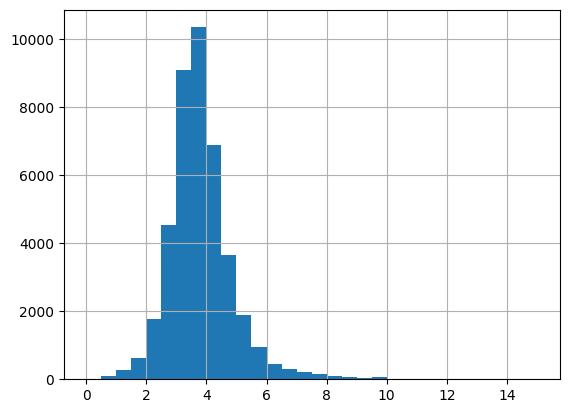

In [9]:
# Visualize the distribution of duration_minutes as a histogram
spotify_population['duration_minutes'].hist(bins=np.arange(0, 15.5, 0.5))

[talk and quizzing about a sample that generalizes well to the population]

### Generating random numbers

Mostly self-explanatory but notice that the `end` parameter of `np.arange()` is not inclusive, meaning that the argument supplied will have to be one `step` higher than otherwise expected:

In [10]:
# Generate random numbers from a Uniform(-3, 3)
uniforms = np.random.uniform(-3, 3, 5000)
uniforms

array([-0.6842,  2.7317, -2.4562, ...,  2.0312,  1.5591, -0.185 ],
      shape=(5000,))

In [11]:
# Generate random numbers from a Normal(5, 2)
normals = np.random.normal(loc=5, scale=2, size=5000)
normals

array([3.1955, 6.586 , 8.353 , ..., 5.6378, 5.6943, 1.1447], shape=(5000,))

(array([223., 205., 202., 223., 216., 192., 201., 199., 214., 189., 201.,
        204., 220., 223., 224., 217., 199., 190., 212., 231., 197., 196.,
        210., 212.]),
 array([-3.  , -2.75, -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  ,
        -0.75, -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,
         1.5 ,  1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ]),
 <BarContainer object of 24 artists>)

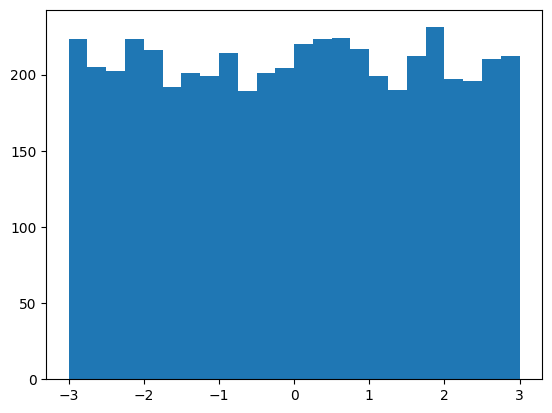

In [12]:
plt.hist(uniforms, bins=np.arange(-3, 3.25, 0.25))

Also notice how the `bins` used here are **very** comprehensive in containing observations up to four SD's away from the mean:

(array([  2.,   3.,   4.,  13.,  37.,  44.,  97., 138., 208., 244., 331.,
        407., 455., 459., 473., 469., 368., 397., 311., 208., 129.,  90.,
         58.,  24.,  19.,   3.,   3.,   2.,   0.,   1.]),
 array([-2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,
         3.5,  4. ,  4.5,  5. ,  5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,
         9. ,  9.5, 10. , 10.5, 11. , 11.5, 12. , 12.5, 13. ]),
 <BarContainer object of 30 artists>)

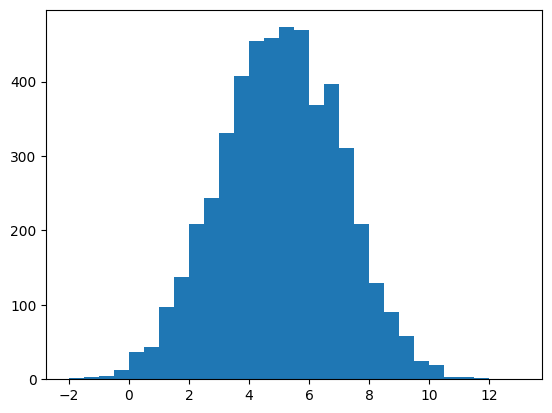

In [13]:
# Generate random numbers from a Normal(5, 2)
normals = np.random.normal(loc=5, scale=2, size=5000)
# Plot a histogram of normal values, binwidth 0.5
plt.hist(normals, bins=np.arange(-2, 13.5, 0.5))

[a little quiz on how seeds for pseudorandom number generators work]

## Sampling Methods

### Simple random sampling

Here `random_state` is used to supply the `.sample()` method of `DataFrame` objects with an RNG seed:

In [14]:
# Sample 70 rows using simple random sampling and set the seed
attrition_samp = attrition_pop.sample(70, random_state=18900217) 
attrition_samp

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1134,35,0.0,Travel_Rarely,583,Research_Development,25,Master,Medical,High,Female,...,Excellent,High,1,16,3,Good,16,10,10,1
1150,52,0.0,Non-Travel,585,Sales,29,Master,Life_Sciences,Low,Male,...,Excellent,Medium,2,16,3,Good,9,8,0,0
531,33,0.0,Travel_Rarely,931,Research_Development,14,Bachelor,Medical,Very_High,Female,...,Excellent,Very_High,1,8,5,Better,8,7,1,6
395,31,0.0,Travel_Rarely,1332,Research_Development,11,College,Medical,High,Male,...,Excellent,Very_High,0,6,2,Good,6,5,0,1
392,29,0.0,Travel_Rarely,942,Research_Development,15,Below_College,Life_Sciences,Medium,Female,...,Excellent,Low,1,6,2,Good,5,4,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,27,0.0,Travel_Frequently,1410,Sales,3,Below_College,Medical,Very_High,Female,...,Outstanding,Medium,2,6,3,Better,6,5,0,4
1180,36,0.0,Travel_Rarely,530,Sales,2,Master,Life_Sciences,High,Female,...,Excellent,High,0,17,2,Good,13,7,6,7
230,26,0.0,Travel_Rarely,1443,Sales,23,Bachelor,Marketing,High,Female,...,Excellent,High,1,5,2,Good,2,2,0,0
211,29,0.0,Travel_Frequently,410,Research_Development,2,Below_College,Life_Sciences,Very_High,Female,...,Excellent,High,3,4,3,Better,3,2,0,2


### Systematic sampling

I'm not sure this method is actually used much in practice (at least as far as Python and data science is concerned):

In [15]:
# Set the sample size to 70
sample_size = 70

# Calculate the population size from attrition_pop
pop_size = len(attrition_pop)

# Calculate the interval
interval = pop_size // sample_size

# Systematically sample 70 rows
attrition_sys_samp = attrition_pop.iloc[::interval]

attrition_sys_samp

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,21,0.0,Travel_Rarely,391,Research_Development,15,College,Life_Sciences,High,Male,...,Excellent,Very_High,0,0,6,Better,0,0,0,0
21,19,0.0,Travel_Rarely,1181,Research_Development,3,Below_College,Medical,Medium,Female,...,Excellent,Very_High,0,1,3,Better,1,0,0,0
42,45,0.0,Travel_Rarely,252,Research_Development,2,Bachelor,Life_Sciences,Medium,Female,...,Excellent,Very_High,0,1,3,Better,1,0,0,0
63,23,0.0,Travel_Rarely,373,Research_Development,1,College,Life_Sciences,Very_High,Male,...,Outstanding,Very_High,1,1,2,Better,1,0,0,1
84,30,1.0,Travel_Rarely,945,Sales,9,Bachelor,Medical,Medium,Male,...,Excellent,High,0,1,3,Good,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1365,48,0.0,Travel_Rarely,715,Research_Development,1,Bachelor,Life_Sciences,Very_High,Male,...,Excellent,High,0,25,3,Best,1,0,0,0
1386,48,0.0,Travel_Rarely,1355,Research_Development,4,Master,Life_Sciences,High,Male,...,Excellent,Medium,0,27,3,Better,15,11,4,8
1407,50,0.0,Travel_Rarely,989,Research_Development,7,College,Medical,Medium,Female,...,Excellent,Very_High,1,29,2,Good,27,3,13,8
1428,50,0.0,Non-Travel,881,Research_Development,2,Master,Life_Sciences,Low,Male,...,Excellent,Very_High,1,31,3,Better,31,6,14,7


### Is systematic sampling OK?

Here substantial sampling bias is shown with higher values of `YearsAtCompany` seen with higher indices:

<Axes: xlabel='index', ylabel='YearsAtCompany'>

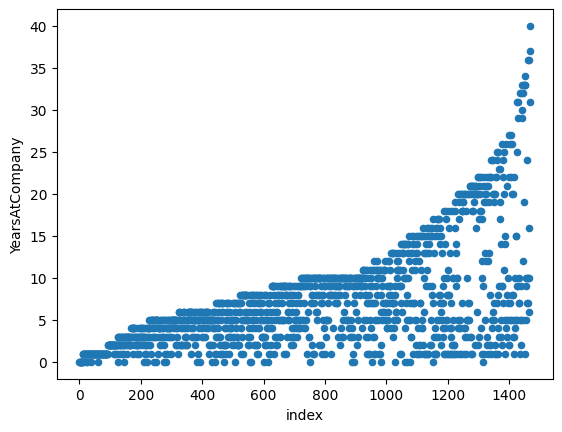

In [16]:
# Add an index column to attrition_pop
attrition_pop_id = attrition_pop.reset_index()

# Plot YearsAtCompany vs. index for attrition_pop_id
attrition_pop_id.plot(x='index', y='YearsAtCompany', kind='scatter')

The bias is eliminated here:

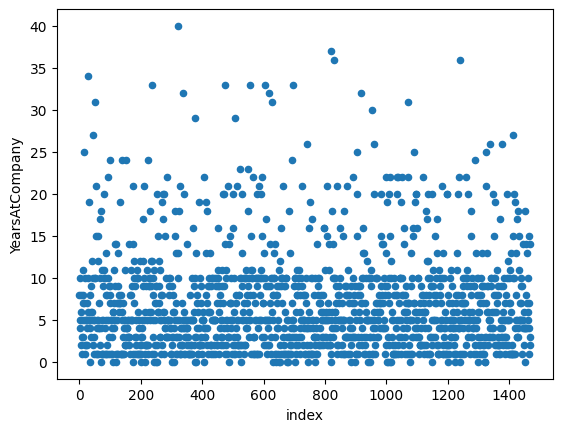

In [17]:
# Shuffle the rows of attrition_pop
attrition_shuffled = attrition_pop.sample(frac=1)

# Reset the row indexes and create an index column
attrition_shuffled = attrition_shuffled.reset_index(drop=True).reset_index()

# Plot YearsAtCompany vs. index for attrition_shuffled
attrition_shuffled.plot(x="index", y="YearsAtCompany", kind="scatter")
plt.show()

### Which sampling method?

![Sampling methods quiz](sampling_methods_quiz.png)